# Character Recognition using CNN
This project is to train a Convolutional Neural Network model to learn and recognize handwritten English Characters. The model is trained on 28x28 images of individual English alphabets. The dataset used is taken from https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format/data# This dataset is a formatted version of the NIST handwritten dataset : https://www.nist.gov/srd/nist-special-database-19

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading and Pre-Processing Data

### Read the CSV file containing the images and labels

In [5]:
df_images = pd.read_csv("/content/drive/My Drive/Character Recognition/A_Z Handwritten Data.csv")
df_images.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_images = df_images.rename(columns={"0":"Label"})
df_images.head()

,Label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


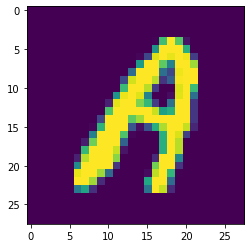

In [7]:
image1 = df_images.iloc[0].values[1:]
image1 = np.reshape(image1, (28,28))
plt.imshow(image1)
plt.show()

### Separate the image data and labels

In [8]:
df_X = df_images.drop(['Label'], axis=1)
df_Y = df_images['Label']

In [9]:
df_X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [11]:
X = df_X.values
Y = df_Y.values
print(X.shape)
print(Y.shape)

(372450, 784)
(372450,)


In [12]:
from sklearn.model_selection import train_test_split

### Split the data into Training set and Testing set

In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2)
print("Training set: {}".format(train_X.shape))
print("Training labels: {}".format(train_Y.shape))
print("Testing set: {}".format(test_X.shape))
print("Testing labels: {}".format(test_Y.shape))

Training set: (297960, 784)
Training labels: (297960,)
Testing set: (74490, 784)
Testing labels: (74490,)


### Reshape the image data to 28 x 28 x 1


In [14]:
train_X = np.reshape(train_X,(train_X.shape[0],28,28))
test_X = np.reshape(test_X,(test_X.shape[0],28,28))
train_X = np.expand_dims(train_X,axis=3)
test_X = np.expand_dims(test_X,axis=3)
print(train_X.shape)
print(test_X.shape)


(297960, 28, 28, 1)
(74490, 28, 28, 1)


### Make labels into one hot vectors

In [15]:
from keras.utils import to_categorical

In [16]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)
print(train_Y.shape)
print(test_Y.shape)

(297960, 26)
(74490, 26)


### Split training dataset into training and validation set

In [17]:
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y)
print("Training set: {}".format(train_X.shape))
print("Training labels: {}".format(train_Y.shape))
print("Validation set: {}".format(test_X.shape))
print("Validation labels: {}".format(test_Y.shape))

Training set: (223470, 28, 28, 1)
Training labels: (223470, 26)
Validation set: (74490, 28, 28, 1)
Validation labels: (74490, 26)


## Build the Model

In this project, the **LeNet-5** CNN model is used. https://engmrk.com/lenet-5-a-classic-cnn-architecture/


In [18]:
from keras import Sequential
from keras.layers import Conv2D, AvgPool2D, Dense, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=5, input_shape=(28,28,1), activation="relu"))
model.add(AvgPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=16,kernel_size=5, activation="relu"))
model.add(AvgPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=120,kernel_size=1, activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(84))
model.add(Dense(26,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 120)         2040      
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

### Plot Model Architecture

In [20]:
from keras.utils import plot_model

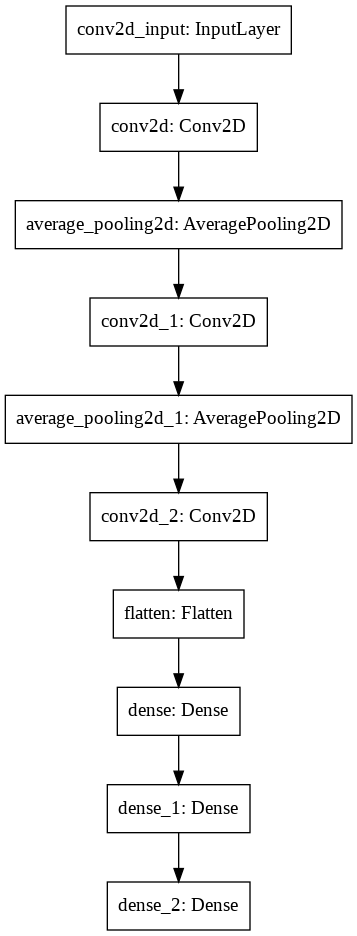

In [21]:
plot_model(model,to_file='model.png')

### Compile and train the model

In [22]:
from keras.optimizers import Adam

In [23]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
history = model.fit(x = train_X, y = train_Y, batch_size = 50, epochs=100, validation_data = (val_X,val_Y))

Epoch 1/100
4470/4470 [==============================] - 18s 4ms/step - loss: 0.2650 - accuracy: 0.9393 - val_loss: 0.1026 - val_accuracy: 0.9712
Epoch 2/100
4470/4470 [==============================] - 19s 4ms/step - loss: 0.1040 - accuracy: 0.9705 - val_loss: 0.1286 - val_accuracy: 0.9665
Epoch 3/100
4470/4470 [==============================] - 18s 4ms/step - loss: 0.0875 - accuracy: 0.9748 - val_loss: 0.1039 - val_accuracy: 0.9689
Epoch 4/100
4470/4470 [==============================] - 18s 4ms/step - loss: 0.0762 - accuracy: 0.9782 - val_loss: 0.0859 - val_accuracy: 0.9753
Epoch 5/100
4470/4470 [==============================] - 19s 4ms/step - loss: 0.0704 - accuracy: 0.9792 - val_loss: 0.0810 - val_accuracy: 0.9772
Epoch 6/100
4470/4470 [==============================] - 19s 4ms/step - loss: 0.0655 - accuracy: 0.9807 - val_loss: 0.0908 - val_accuracy: 0.9735
Epoch 7/100
4470/4470 [==============================] - 18s 4ms/step - loss: 0.0623 - accuracy: 0.9819 - val_loss: 0.0765 -

In [25]:
model.save("trained_model.h5")

## Evaluate Model

### Predict labels for test set 

In [26]:
test_pred = model.predict(test_X, batch_size=50)

In [27]:
test_pred =np.argmax(test_pred, axis=1)

In [28]:
test_Y = np.argmax(test_Y,axis=1)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Calculate Accuracy, Precision, Recall and F1 of the model on test set

In [30]:
acc = accuracy_score(test_Y, test_pred)

print("Test Accuracy = {}".format(acc))

Test Accuracy = 0.9834608672305007


In [31]:
prec = precision_score(test_Y, test_pred,average=None)

print("Test Precision Classwise= {}".format(prec))

prec = precision_score(test_Y, test_pred,average='micro')

print("Test Precision Overall= {}".format(prec))

Test Precision Classwise= [0.98554391 0.97477578 0.98493976 0.94639376 0.98464318 0.95495495
 0.97145406 0.97582418 0.97058824 0.96414112 0.97321429 0.98663793
 0.98700771 0.97018828 0.98599248 0.99287787 0.96711111 0.98244074
 0.99548486 0.99272647 0.98697292 0.98446834 0.98125586 0.98433829
 0.96989051 0.98111588]
Test Precision Overall= 0.9834608672305007


In [32]:
rec = recall_score(test_Y, test_pred, average=None)

print("Test Recall Classwise= {}".format(rec))

rec = recall_score(test_Y, test_pred, average='micro')

print("Test Recall Overall= {}".format(rec))

Test Recall Classwise= [0.98412126 0.97477578 0.98642534 0.94639376 0.97321429 0.94642857
 0.95610184 0.94535131 0.98297872 0.97542422 0.97321429 0.98198198
 0.98381222 0.98330241 0.99217877 0.98585647 0.97753819 0.97219809
 0.99456633 0.9909791  0.98612776 0.98564593 0.98033708 0.96990741
 0.98654292 0.98364888]
Test Recall Overall= 0.9834608672305007


In [33]:
f1 = f1_score(test_Y, test_pred, average=None)

print("Test F1 Score Classwise= {}".format(f1))

f1 = f1_score(test_Y, test_pred, average='micro')

print("Test F1 Score Overall= {}".format(f1))

Test F1 Score Classwise= [0.98483207 0.97477578 0.98568199 0.94639376 0.97889537 0.95067265
 0.96371681 0.96034607 0.97674419 0.96974985 0.97321429 0.98430445
 0.98540738 0.97670133 0.98907595 0.98935471 0.97229669 0.97729258
 0.99502539 0.99185201 0.98655016 0.98505678 0.98079625 0.97706957
 0.97814585 0.98238075]
Test F1 Score Overall= 0.9834608672305007


### Calculate and plot confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
conf_mat = confusion_matrix(test_Y, test_pred)

print("Test confusion matrix = {}".format(conf_mat))

Test confusion matrix = [[ 2727     5     0     3     0     0     0     6     0     1     0     0
     13     7     2     0     1     5     0     0     1     0     0     0
      0     0]
 [    2  1739     1    22     0     0     2     0     0     0     0     0
      1     1     4     1     1     5     3     0     0     0     0     0
      0     2]
 [    0     0  4578     0    11     0     1     0     0     0     0    14
      0     2    16     0     2     5     0     6     3     0     0     0
      0     3]
 [    1     1     0  1942     0     0     0     0     0     4     0     0
      0     0    95     2     1     0     4     0     2     0     0     0
      0     0]
 [    0     0    14     0  2180     3    17     0     1     1     3     1
      0     0     3     2     1     1     8     0     1     0     0     0
      0     4]
 [    0     0     0     0     4   212     2     0     0     0     0     0
      0     0     1     0     0     0     0     5     0     0     0     0
      0     0

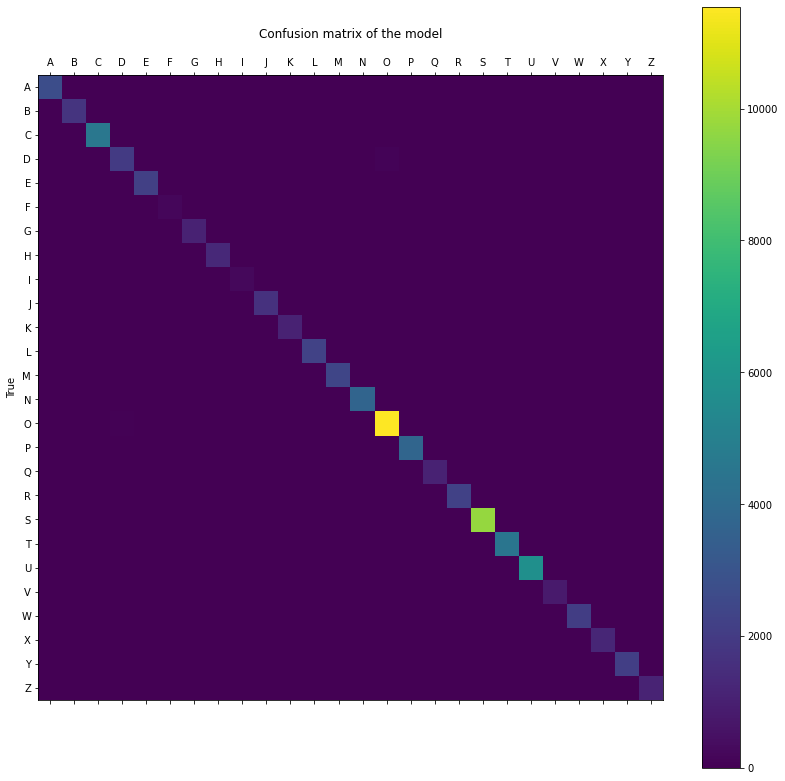

In [36]:
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Confusion matrix of the model')
fig.colorbar(cax)
plt.xticks(np.arange(0, 26, 1.0))
plt.yticks(np.arange(0, 26, 1.0))
ax.set_xticklabels( labels)
ax.set_yticklabels( labels)
plt.ylabel('True')
plt.show()